<class 'pandas.core.frame.DataFrame'>
Index: 3654 entries, 3653 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3654 non-null   datetime64[ns]
 1   Price     3654 non-null   object        
 2   Open      3654 non-null   object        
 3   High      3654 non-null   object        
 4   Low       3654 non-null   object        
 5   Vol.      3654 non-null   object        
 6   Change %  3654 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 228.4+ KB
Epoch 1/100


c:\Users\sishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 226ms/step - loss: 0.0264
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 163ms/step - loss: 0.0020
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.0019
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.0015
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.0016
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 0.0015
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.0015
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.0012
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 0.0012
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 9.9939e-04
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0010
Epoch 12/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 0.0011
Epoch 13/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 9.1092e-04
Epoch 14/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 8.8397e-04
Epoch 15/100
89/89 ━━━━━━━━━━━

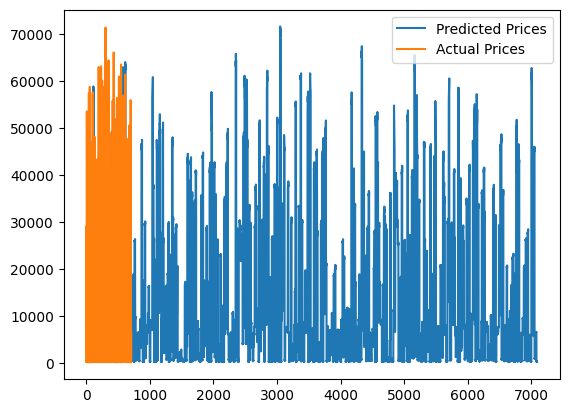

In [7]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import math

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the data into a Pandas DataFrame
bt = pd.read_csv("Bitcoin Historical Data (2014-2024).csv")

# Convert the date column to datetime format if it's not already in datetime
bt['Date'] = pd.to_datetime(bt['Date'], format='%m/%d/%Y')

# Sort the DataFrame by the 'Date' column in ascending order
bt = bt.sort_values(by='Date', ascending=True)

# Columns information
bt.info()

# Convert 'Price' column to float
bt["Price"] = bt["Price"].apply(lambda x: float(x.replace(',', '')))

# Only use the 'Price' column
bitcoin_prices = bt["Price"]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
bitcoin_prices_scaled = scaler.fit_transform(np.array(bitcoin_prices).reshape(-1, 1))

# Splitting the data set into train and test split
X, y = [], []
for i in range(len(bitcoin_prices_scaled) - 100 - 10):
    X.append(bitcoin_prices_scaled[i:i + 100])
    y.append(bitcoin_prices_scaled[i + 100:i + 100 + 10])

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=10))  # 10 output nodes for predicting the next 10 days
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

# Do the prediction
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Convert prediction values to discrete classes
y_pred_classes = np.where(np.diff(predictions, axis=0) > 0, 1, np.where(np.diff(predictions, axis=0) < 0, 0, 2)).reshape(-1)

# Convert true labels to discrete classes
y_true_classes = np.where(np.diff(scaler.inverse_transform(y_test.reshape(-1, 1)), axis=0) > 0, 1,
                          np.where(np.diff(scaler.inverse_transform(y_test.reshape(-1, 1)), axis=0) < 0, 0,
                                   2)).reshape(-1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

# Plotting the results
plt.plot(predictions, label='Predicted Prices')
plt.plot(scaler.inverse_transform(y_test[:, 0]), label='Actual Prices')
plt.legend()
plt.show()
